In [1]:
# Import dependecies
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Descriptors import ExactMolWt
enumerator = rdMolStandardize.TautomerEnumerator()

#### BASIC THOUGHT:
maybe we cant solve the most canonical molecule problem, but since we are working with graphs we want to eliminate isomorphism  from graph.


## 1 CANONICAL SMILES

In [2]:
#Enter 2 tautomer
smiles_1 = "CN2C(=O)N(C)C(=O)C1=C2N=CN1C"
smiles_2 = "CN1C=NC2=C1C(=O)N(C)C(=O)N2C"

# Convert them to MOl, then back to smiles but wth can option

# 1st convert to mol
mol_1 = Chem.MolFromSmiles(smiles_1) 
mol_2 = Chem.MolFromSmiles(smiles_2 ) 

# 2nd convert back to smiles
can_1 = Chem.MolToSmiles(mol_1)
can_2 = Chem.MolToSmiles(mol_2)

#Lets visualize the output as strings
print("                            INPUT: ")
print(smiles_1,"   ",smiles_2)
print("                            OUTPUT: ")
print(can_1,"      ",can_2)

#lets verify can1 and can2 are the same
if can_1 == can_2:
    print(" \ncan_1 and can_2 have the same string ")

                            INPUT: 
CN2C(=O)N(C)C(=O)C1=C2N=CN1C     CN1C=NC2=C1C(=O)N(C)C(=O)N2C
                            OUTPUT: 
Cn1c(=O)c2c(ncn2C)n(C)c1=O        Cn1c(=O)c2c(ncn2C)n(C)c1=O
 
can_1 and can_2 have the same string 


In [ ]:
#INCHI 

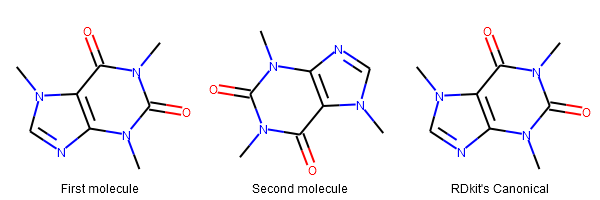

In [3]:
# Lets convert the canonical representation to mol so we can visualize it:
canonical = Chem.MolFromSmiles(can_1)
summary = [mol_1,mol_2,canonical]
legend_list= ["First molecule","Second molecule","RDkit's Canonical"]
img = Draw.MolsToGridImage(summary,molsPerRow =3,legends=legend_list)
img

# RDKIT's canonical reduction works  but can it handdle tuatomers? lets see!!

## 2 CANONICAL SMILES AND TAUTOMERS:

In [4]:
network=["CN2C(=O)N(C)C(=O)C1=C2N=CN1C","CN1C=NC2=C1C(=O)N(C)C(=O)N2C","O=C1NC=CC(=O)N1","Oc1ccnc(O)n1","O=c1c2c[nH]ccc-2nc2ccccc12","O=c1c2ccccc2[nH]c2ccncc12","Oc1c2ccccc2nc2ccncc12"]
#network=["O=c1c2ccccc2[nH]c2ccncc12","CN1C=NC2=C1C(=O)N(C)C(=O)N2C","O=C1NC=CC(=O)N1","Oc1ccnc(O)n1","O=c1c2c[nH]ccc-2nc2ccccc12","Oc1c2ccccc2nc2ccncc12","CN2C(=O)N(C)C(=O)C1=C2N=CN1C"]

# BASIC NOTATION
# name  == SMILES string list
# name_molecule == Molecule object list

molecules = []         # a list that will hold Molecule objects
canonicals = []        # a list that will hold string canonical SMILES
canonical_molecules=[] # a list that will hold the canonical representation in Molecule objects
tautomer_molecules =[] # a list that will hold the most stable tautomer
tautomer = []
for i in range(0,len(network)):
    
    #conver to mol object
    mol = Chem.MolFromSmiles(network[i])
    molecules.append(mol)
    
    #back to smiles (this will creat canonical strings)
    can = Chem.MolToSmiles(mol)
    canonicals.append(can)
    
    #convert back to molto see if there are in fact canonical
    can_mol=Chem.MolFromSmiles(can)
    canonical_molecules.append(can_mol)
    
    #get tautomer (it only works with molecule objects)
    taut_mol = enumerator.Canonicalize(can_mol)
    tautomer_molecules.append(taut_mol)
    #get tautomer's smiles 
    taut = Chem.MolToSmiles(mol)
    tautomer.append(taut)


Huge problem!!! even though the tautomer_molcule object is canonical, the smiles string is not :C  lets see:

In [5]:
tautomer # even thoug in the next figures we'll se that the molecule object is canonical, we see a bunch of different strings

['Cn1c(=O)c2c(ncn2C)n(C)c1=O',
 'Cn1c(=O)c2c(ncn2C)n(C)c1=O',
 'O=c1cc[nH]c(=O)[nH]1',
 'Oc1ccnc(O)n1',
 'O=c1c2c[nH]ccc-2nc2ccccc12',
 'O=c1c2ccccc2[nH]c2ccncc12',
 'Oc1c2ccccc2nc2ccncc12']

In [6]:
## LETS FIX it:

In [9]:
A = [] #list of sets
B = [] #list of sets
canonical_tautomer = [] #list that will have the final output

for mi in tautomer_molecules:
    A.append(mi.GetNumAtoms()) # Give A a property
    B.append(ExactMolWt(mi))   # Give B a property
    
set_A = list(set(A)) # Get the set of A 
set_B = list(set(B)) # Get the set of B

assert(len(set_A)==len(set_B))
num_of_taut = len(set_A)  # Get the number of tautomer (According to set)
master = {}  # complex stuff

for i in range(0,num_of_taut): # more complex stuff (based on Neural Net Weight initalization strategy)
    master['t' + str(i)]="NONE"


for i in range(0,num_of_taut): #iterate over the numer of tautomers
    for a,b,c in zip(A,B,tautomer):            # zip A,B to iterate
        if  a == set_A[i]  and b == set_B[i]:  # If a & b belong to subset
            if master['t' + str(i)] == "NONE": # and there is no registration 
                master['t' + str(i)] = c       # create registration
                canonical_tautomer.append(c)   #  append registration
            else:
                canonical_tautomer.append(master['t' + str(i)]) # if not new append old registration 

In [10]:
canonical_tautomer # Now we have canonical strings c;

['O=c1cc[nH]c(=O)[nH]1',
 'O=c1cc[nH]c(=O)[nH]1',
 'Cn1c(=O)c2c(ncn2C)n(C)c1=O',
 'Cn1c(=O)c2c(ncn2C)n(C)c1=O',
 'O=c1c2c[nH]ccc-2nc2ccccc12',
 'O=c1c2c[nH]ccc-2nc2ccccc12',
 'O=c1c2c[nH]ccc-2nc2ccccc12']

In [11]:
# Some visual settings 
tab="\t\t\t        " #adds tabs 
legend_list2= ["First molecule","Second molecule","Third molecule","Fuorth Molecule","Fith molecule","Sixth molecule",
               "Seventh molecule"]

			        INPUT MOLECULES:


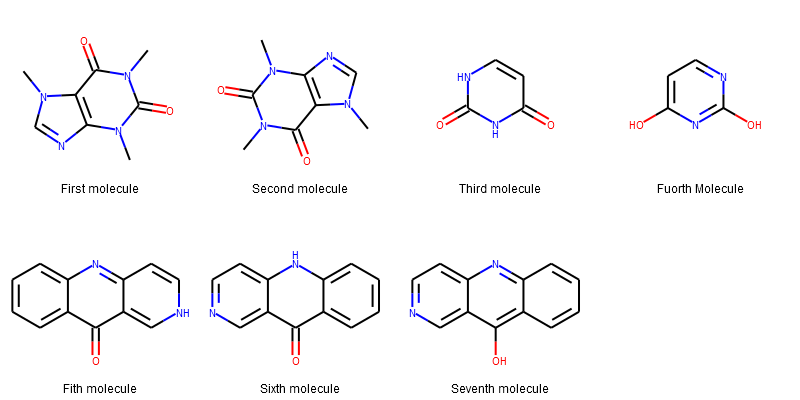

In [12]:
print(     "\033[1m" + tab +"INPUT MOLECULES:" + "\033[0m") # title in bold
img = Draw.MolsToGridImage(molecules,molsPerRow =4,legends=legend_list2)
img
# It is clearly seen that every input is different from each other

			        CANONICAL MOLECULES:


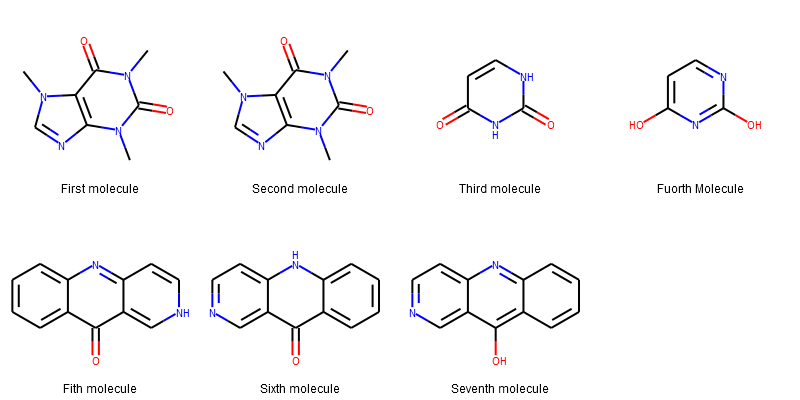

In [13]:
print(     "\033[1m" + tab +"CANONICAL MOLECULES:" + "\033[0m") # title in bold
img = Draw.MolsToGridImage(canonical_molecules,molsPerRow =4,legends=legend_list2)
img
# RDKIT's canonical reduction works but it can't handle tautomers

			        TAUTOMR MOLECULES:


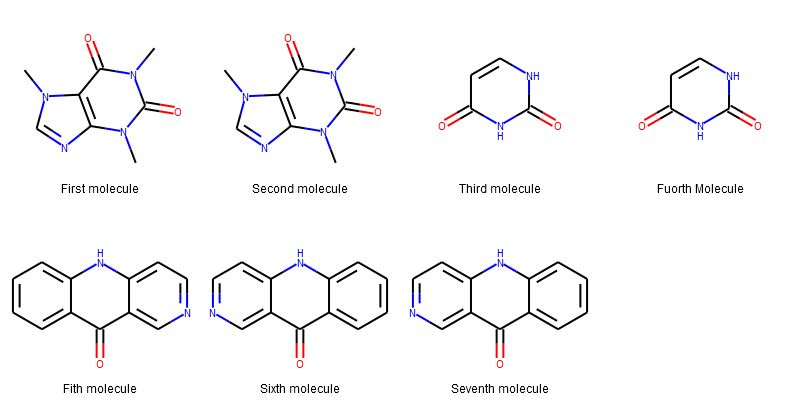

In [14]:
print(     "\033[1m" + tab +"TAUTOMR MOLECULES:" + "\033[0m") # title in bold
img = Draw.MolsToGridImage(tautomer_molecules,molsPerRow =4,legends=legend_list2)
img
# using enumerator.Canonicalize we were able to obtain the canoncial form 

# 3 Create a python funtion 

In [18]:
from tautomer_finder import get_canonical_molecules,get_canonical_strings, plot_molecules

			      TAUTOMR MOLECULES:


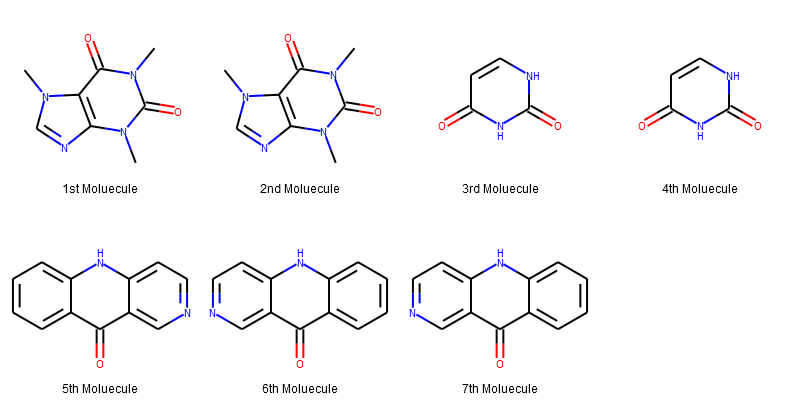

In [17]:
(tautomer,tautomer_molecules) = get_canonical_molecules(network)
plot_molecules(tautomer_molecules)

In [23]:
(cannonical_smiles,number_of_different_molecules) =get_canonical_strings(tautomer,tautomer_molecules)
print(cannonical_smiles)
print("\nNumber of differente molecules: ",number_of_different_molecules )

['O=c1cc[nH]c(=O)[nH]1', 'O=c1cc[nH]c(=O)[nH]1', 'Cn1c(=O)c2c(ncn2C)n(C)c1=O', 'Cn1c(=O)c2c(ncn2C)n(C)c1=O', 'O=c1c2c[nH]ccc-2nc2ccccc12', 'O=c1c2c[nH]ccc-2nc2ccccc12', 'O=c1c2c[nH]ccc-2nc2ccccc12']

Number of differente molecules:  3


### Bibliography:
[1.- SMILES ](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html) <br />
[2.- Toward a Universal SMILES representation](https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-4-22) <br />
[3.- Convert a SMILES string to Canonical](https://ctr.fandom.com/wiki/Convert_a_SMILES_string_to_canonical_SMILES)

Play ground (DONT MIND THIS SECTION)

In [223]:
legend_list=[]
for i in range(1,len(tautomer_molecules)+1):
    if ((i-1) % 2) == 0:
        dummie="st"
    elif ((i-2) % 2) == 0:
        dummie="nd"
    elif ((i-3) % 2) == 0:
            dummie="rd"
    else:
        dummie="th"
        
    legend_list.append(str(i)+ dummie + " Moluecule")
legend_list

['1st Moluecule',
 '2nd Moluecule',
 '3st Moluecule',
 '4nd Moluecule',
 '5st Moluecule',
 '6nd Moluecule',
 '7st Moluecule']